<a href="https://colab.research.google.com/github/Rajeshkathiresan1146/final_project_dissertation/blob/main/project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install netCDF4
%pip install cartopy


In [ ]:
import numpy as np
import numpy.ma as ma
import netCDF4
import matplotlib
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [ ]:
# Function to read a NetCDF climate file of monthly data and print statistics
def read_nc(filename):
    """
    Function read_nc
    Read a monthly climate data netCDF file and extract map series and dates
    :param filename: filename as a string
    :returns: (map series: numpy array(month, lat, lon), dates: list[(year, month)])
    """
    # Read in data from .nc file
    nc1 = netCDF4.Dataset(filename)
    variable_stats = {}

    for key in nc1.variables:
        var_data = np.ma.filled(nc1.variables[key][:], np.nan)
        total_values = var_data.size
        missing_values = np.isnan(var_data).sum()
        variable_stats[key] = {
            'total_values': total_values,
            'missing_values': missing_values
        }

    print(f"Statistics for {filename}:")
    for var, stats in variable_stats.items():
        print(f"Variable '{var}': Total Values = {stats['total_values']}, Missing Values = {stats['missing_values']}")

    # Identify the primary data variable (with the highest dimensions)
    key = sorted([(nc1.variables[k].ndim, k) for k in nc1.variables])[-1][1]

    # Extract the data and convert time to year and month
    tmaps = np.ma.filled(nc1.variables[key][:, :, :], np.nan)
    time1 = nc1.variables["time"][:]
    unit1 = nc1.variables["time"].units
    dates = [(x.year, x.month) for x in netCDF4.num2date(time1, units=unit1)]

    return tmaps, dates

# Function to plot a map
def plot_map(tmap, cmap, title):
    lons = np.arange(tmap.shape[1] + 1) * 360 / tmap.shape[1] - 180
    lats = np.arange(tmap.shape[0] + 1) * 180 / tmap.shape[0] - 90
    tmap = ma.masked_array(data=tmap, mask=np.isnan(tmap))

    w = 8.0
    h = 5.0
    fig = plt.figure(figsize=(w, h))

    ax = plt.axes(projection=ccrs.PlateCarree())
    m = plt.pcolormesh(lons, lats, tmap, cmap=cmap)
    plt.colorbar(m, ax=ax, orientation="horizontal", pad=0.01, aspect=40)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, color='k', linestyle=':')
    ax.coastlines(linewidth=1.0)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Function to plot boxplot and histogram for outlier detection
def plot_outliers(data, variable_name):
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data.flatten())
    plt.title(f'Boxplot of {variable_name}')

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(data.flatten(), bins=100, edgecolor='k')
    plt.title(f'Histogram of {variable_name}')

    plt.tight_layout()
    plt.show()

# Function to count missing values
def count_missing_values(data_array):
    return np.isnan(data_array).sum()


Statistics for /content/drive/MyDrive/Project_final/CRUTEM.5.0.2.0.anomalies (1).nc:
Variable 'tas': Total Values = 5414688, Missing Values = 4249071
Variable 'time': Total Values = 2089, Missing Values = 0
Variable 'time_bnds': Total Values = 4178, Missing Values = 0
Variable 'latitude': Total Values = 36, Missing Values = 0
Variable 'latitude_bnds': Total Values = 72, Missing Values = 0
Variable 'longitude': Total Values = 72, Missing Values = 0
Variable 'longitude_bnds': Total Values = 144, Missing Values = 0


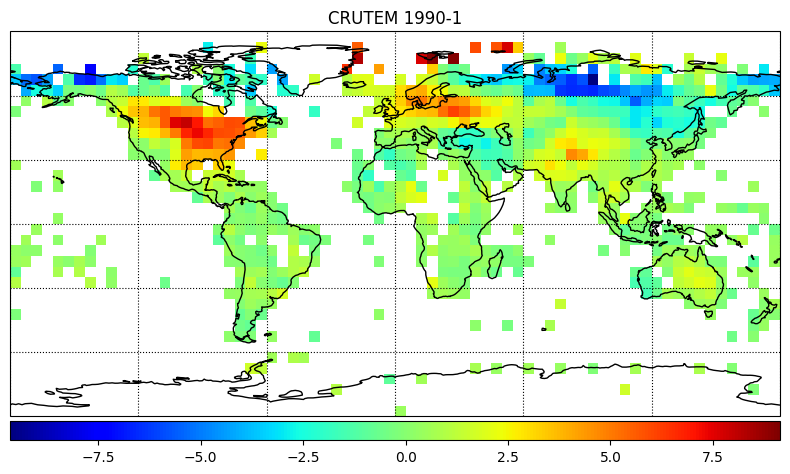

Statistics for /content/drive/MyDrive/Project_final/HadSST.4.0.1.0_median (1).nc:
Variable 'tos': Total Values = 5417280, Missing Values = 3412111
Variable 'time': Total Values = 2090, Missing Values = 0
Variable 'time_bnds': Total Values = 4180, Missing Values = 0
Variable 'latitude': Total Values = 36, Missing Values = 0
Variable 'latitude_bnds': Total Values = 72, Missing Values = 0
Variable 'longitude': Total Values = 72, Missing Values = 0
Variable 'longitude_bnds': Total Values = 144, Missing Values = 0


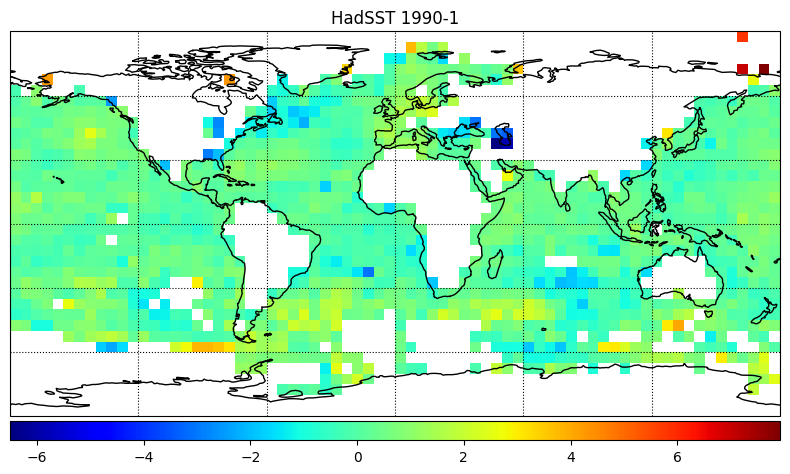

In [ ]:
# year and month to plot
y1 = 1990
m1 = 1
cmap = matplotlib.cm.jet

# read in data from .nc file
tmaps,dates = read_nc("/content/drive/MyDrive/Project_final/CRUTEM.5.0.2.0.anomalies (1).nc")

# find the right month
for m in range(len(dates)):
  y2,m2 = dates[m]
  if y1 == y2 and m1 == m2:
    break

# plot the map for the given month
plot_map( tmaps[m,:,:], cmap, title=f'CRUTEM {y2}-{m2}')

# read in data from .nc file
tmaps,dates = read_nc("/content/drive/MyDrive/Project_final/HadSST.4.0.1.0_median (1).nc")

# find the right month
for m in range(len(dates)):
  y2,m2 = dates[m]
  if y1 == y2 and m1 == m2:
    break

# plot the map for the given month
plot_map( tmaps[m,:,:], cmap, title=f'HadSST {y2}-{m2}' )

Statistics for /content/drive/MyDrive/Project_final/CRUTEM.5.0.2.0.anomalies (1).nc:
Variable 'tas': Total Values = 5414688, Missing Values = 4249071
Variable 'time': Total Values = 2089, Missing Values = 0
Variable 'time_bnds': Total Values = 4178, Missing Values = 0
Variable 'latitude': Total Values = 36, Missing Values = 0
Variable 'latitude_bnds': Total Values = 72, Missing Values = 0
Variable 'longitude': Total Values = 72, Missing Values = 0
Variable 'longitude_bnds': Total Values = 144, Missing Values = 0
Missing values in CRUTEM before filling: 4249071


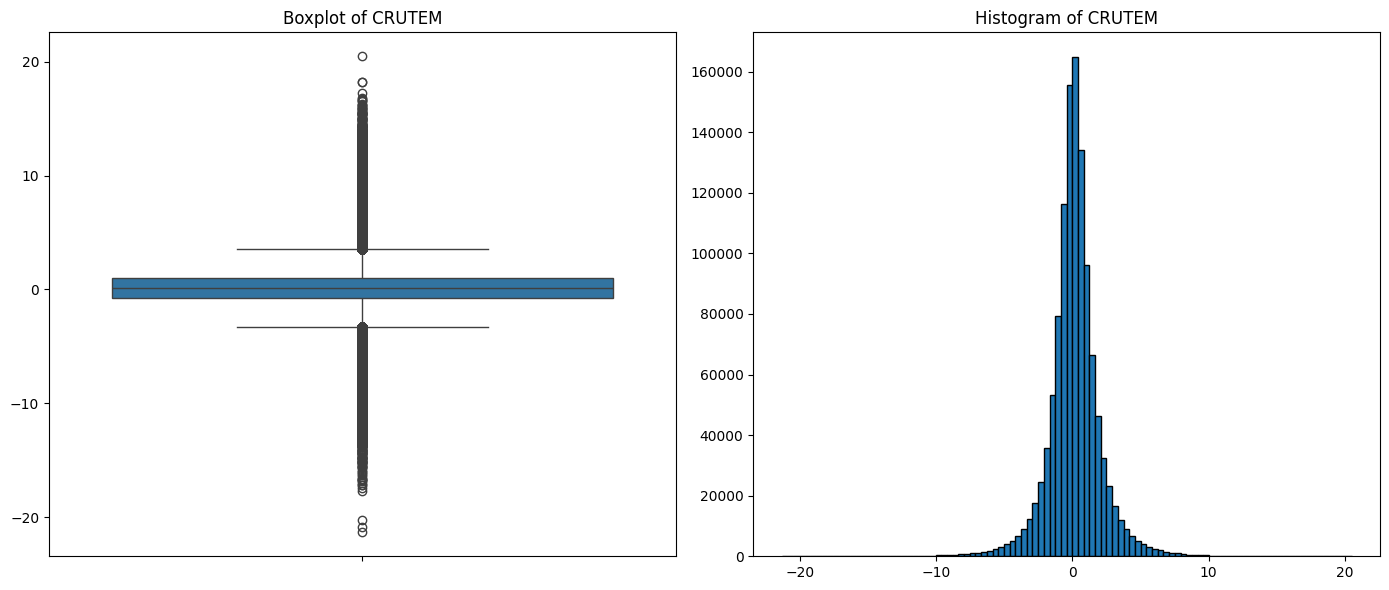

Statistics for /content/drive/MyDrive/Project_final/HadSST.4.0.1.0_median (1).nc:
Variable 'tos': Total Values = 5417280, Missing Values = 3412111
Variable 'time': Total Values = 2090, Missing Values = 0
Variable 'time_bnds': Total Values = 4180, Missing Values = 0
Variable 'latitude': Total Values = 36, Missing Values = 0
Variable 'latitude_bnds': Total Values = 72, Missing Values = 0
Variable 'longitude': Total Values = 72, Missing Values = 0
Variable 'longitude_bnds': Total Values = 144, Missing Values = 0
Missing values in HadSST before filling: 3412111


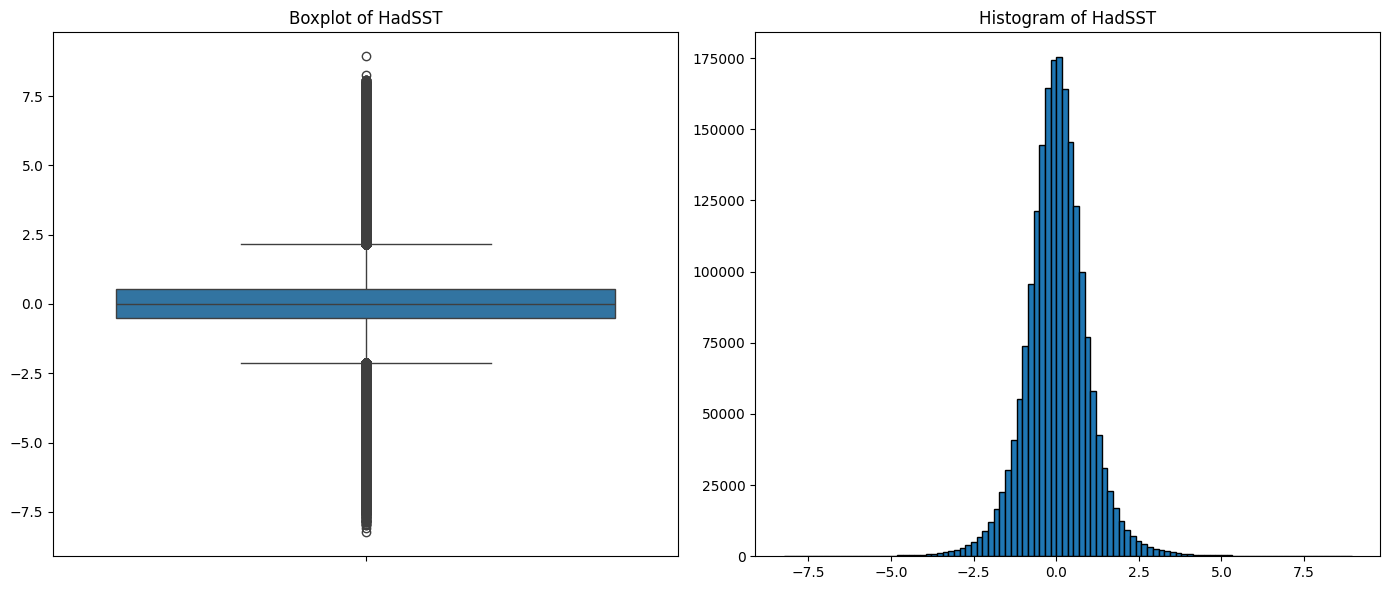

In [ ]:
# Year and month to plot
year_to_plot = 1990
cmap = matplotlib.cm.jet

# Read in data from CRUTEM NetCDF file
tmaps_crutem, dates_crutem = read_nc("/content/drive/MyDrive/Project_final/CRUTEM.5.0.2.0.anomalies (1).nc")

# Count and print missing values before filling
missing_before_filling_crutem = count_missing_values(tmaps_crutem)
print(f"Missing values in CRUTEM before filling: {missing_before_filling_crutem}")

# Plot outliers for CRUTEM data before filling
plot_outliers(tmaps_crutem, 'CRUTEM')

# Read in data from HadSST NetCDF file
tmaps_hadsst, dates_hadsst = read_nc("/content/drive/MyDrive/Project_final/HadSST.4.0.1.0_median (1).nc")

# Count and print missing values before filling
missing_before_filling_hadsst = count_missing_values(tmaps_hadsst)
print(f"Missing values in HadSST before filling: {missing_before_filling_hadsst}")

# Plot outliers for HadSST data before filling
plot_outliers(tmaps_hadsst, 'HadSST')


Statistics for /content/drive/MyDrive/Project_final/CRUTEM.5.0.2.0.anomalies (1).nc:
Variable 'tas': Total Values = 5414688, Missing Values = 4249071
Variable 'time': Total Values = 2089, Missing Values = 0
Variable 'time_bnds': Total Values = 4178, Missing Values = 0
Variable 'latitude': Total Values = 36, Missing Values = 0
Variable 'latitude_bnds': Total Values = 72, Missing Values = 0
Variable 'longitude': Total Values = 72, Missing Values = 0
Variable 'longitude_bnds': Total Values = 144, Missing Values = 0
Missing values in CRUTEM before filling: 4249071


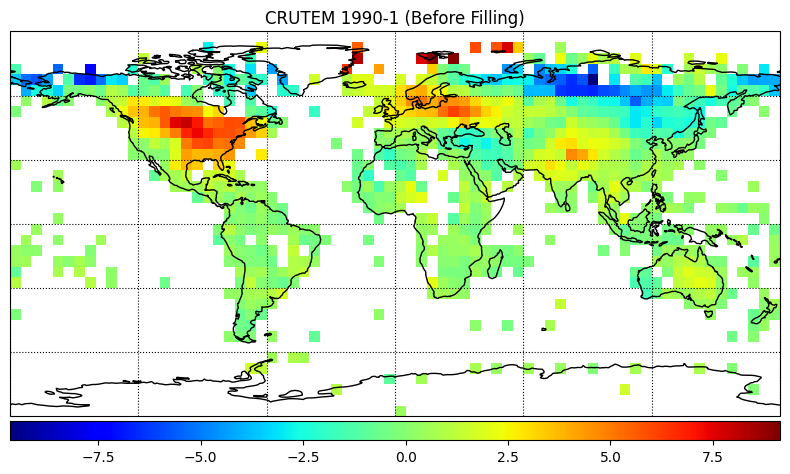

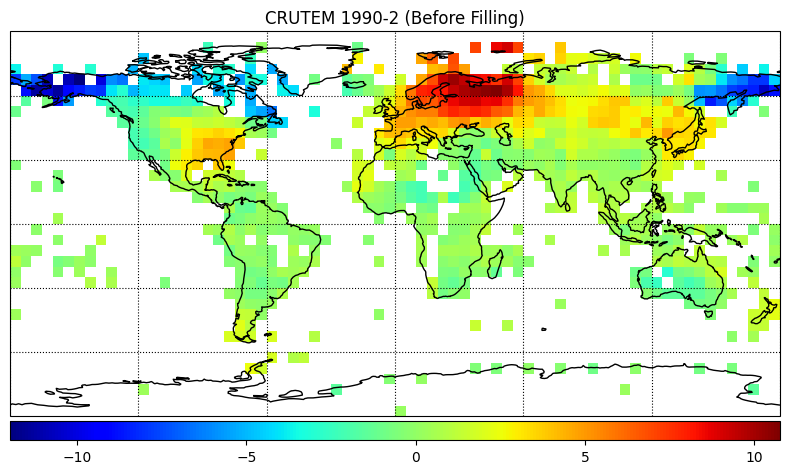

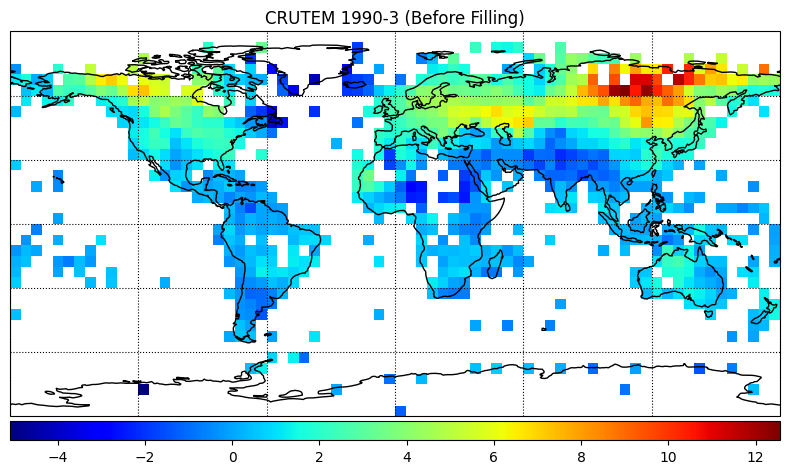

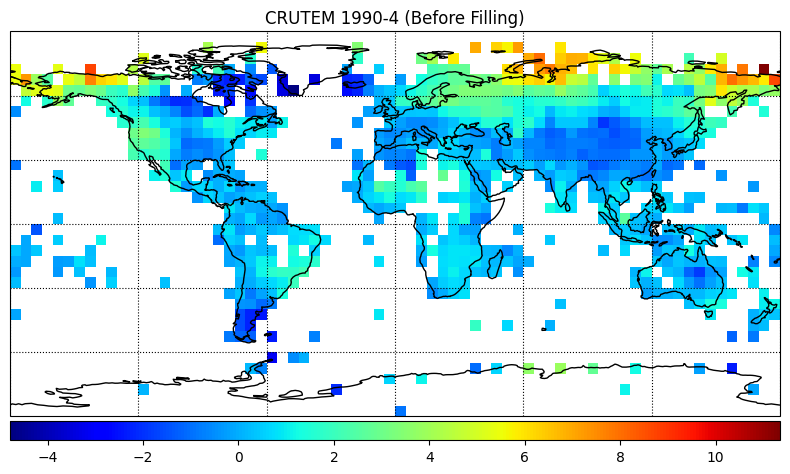

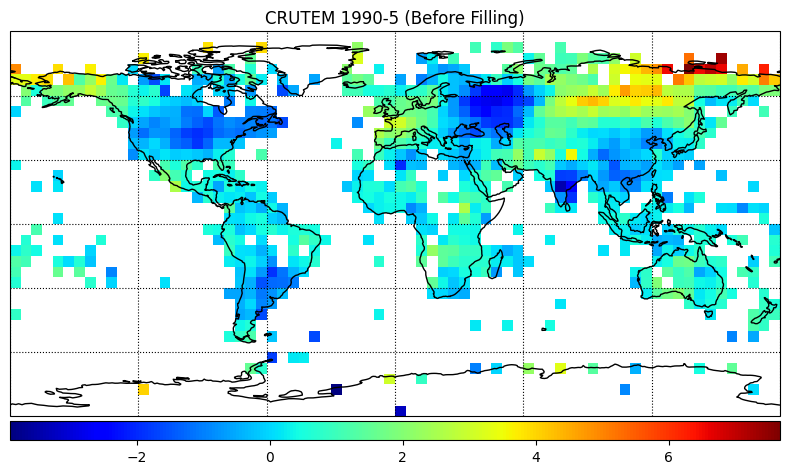

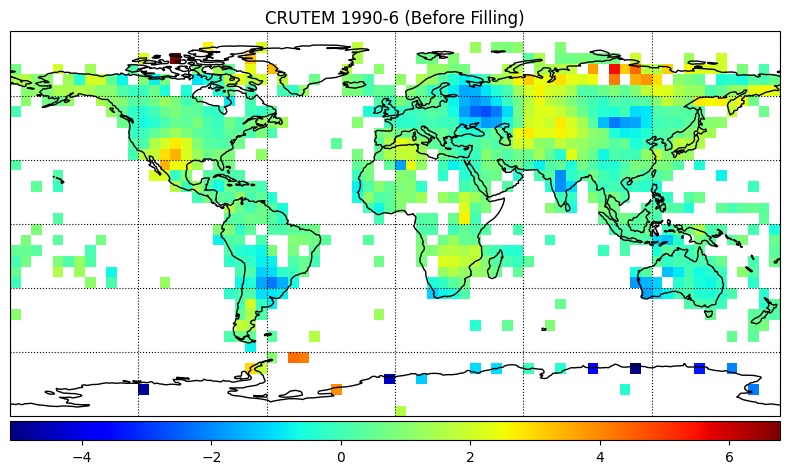

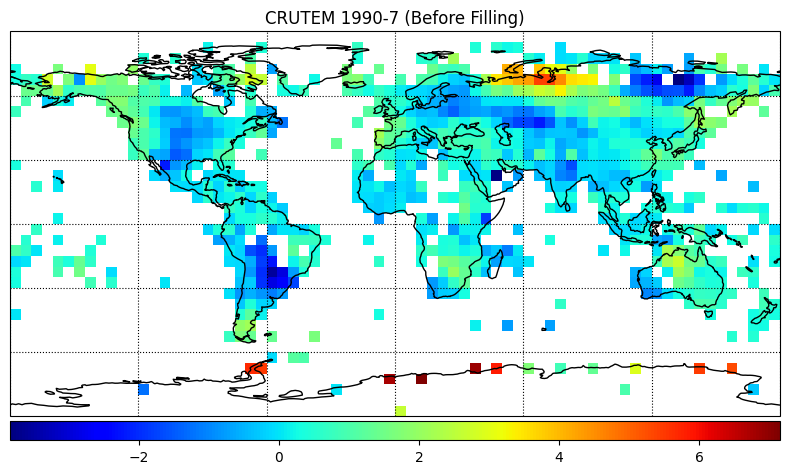

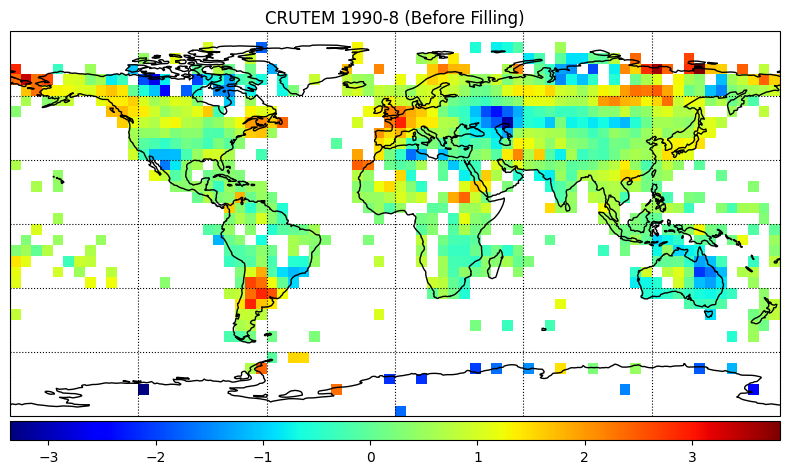

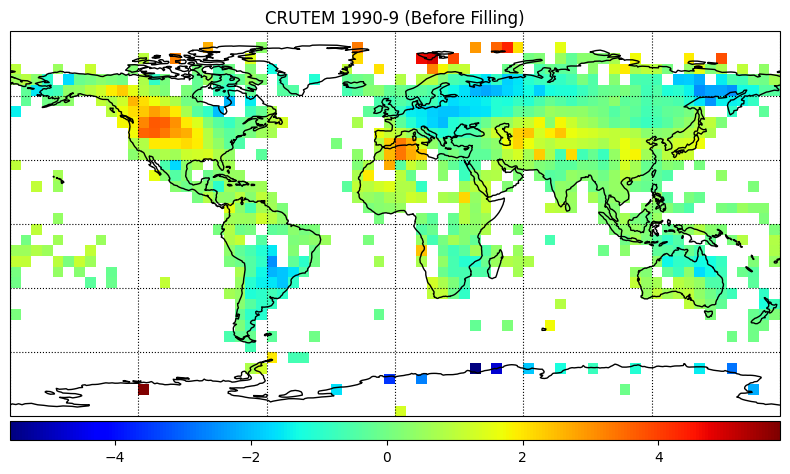

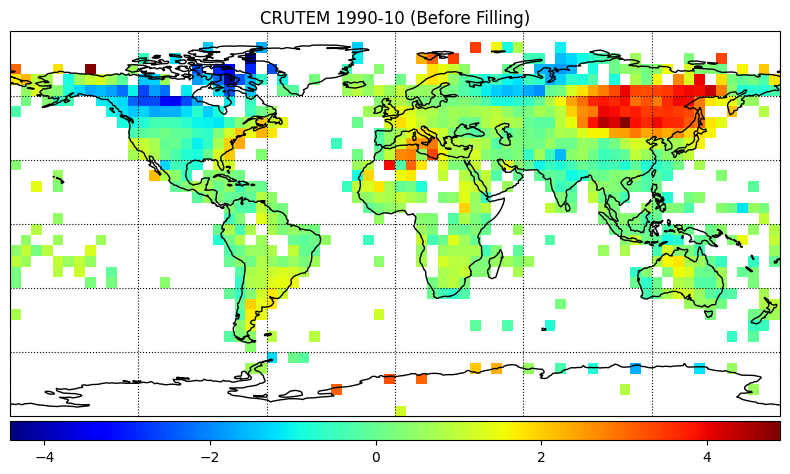

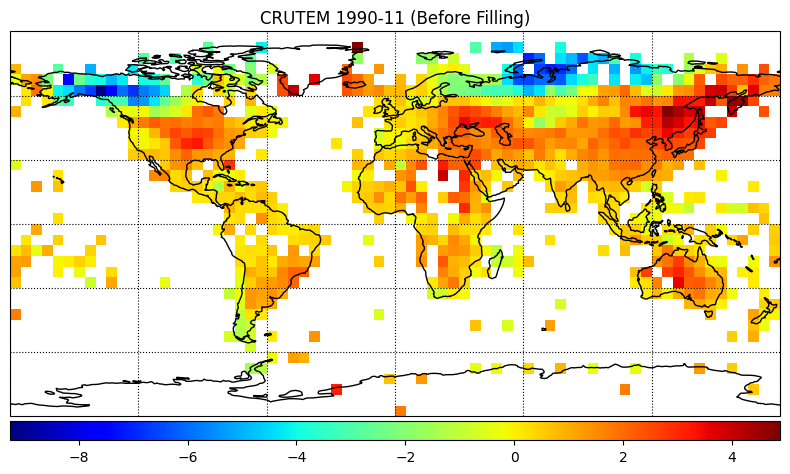

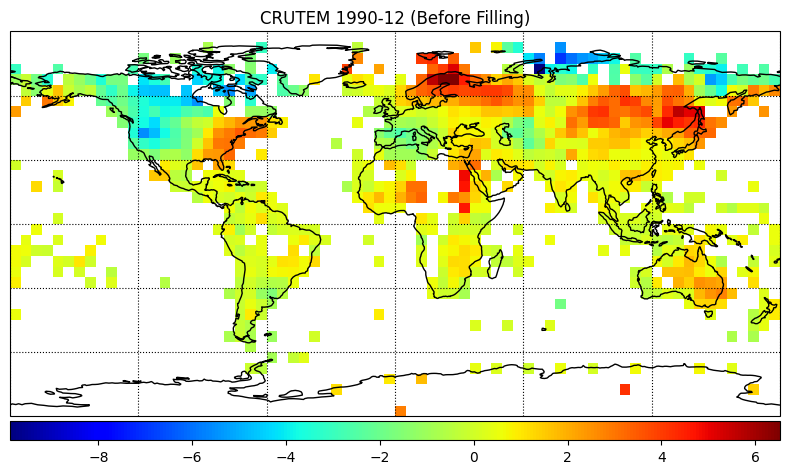

Missing values in CRUTEM after filling: 3438494


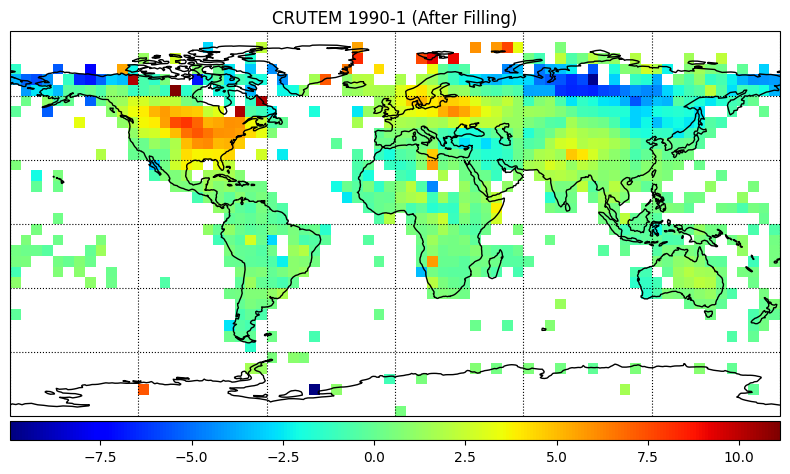

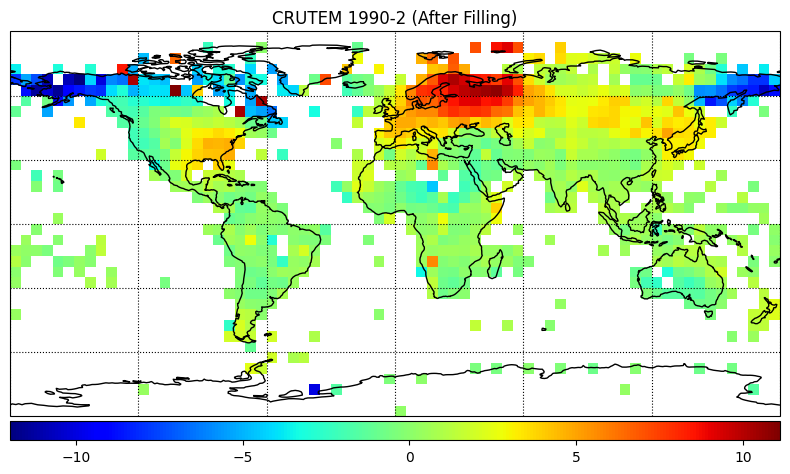

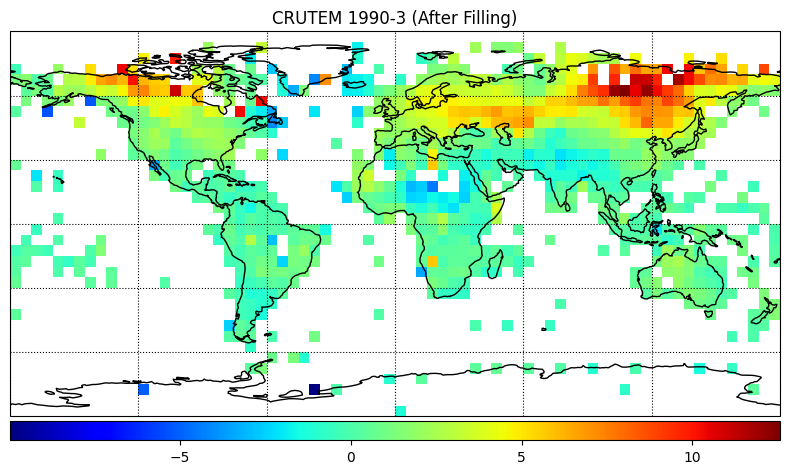

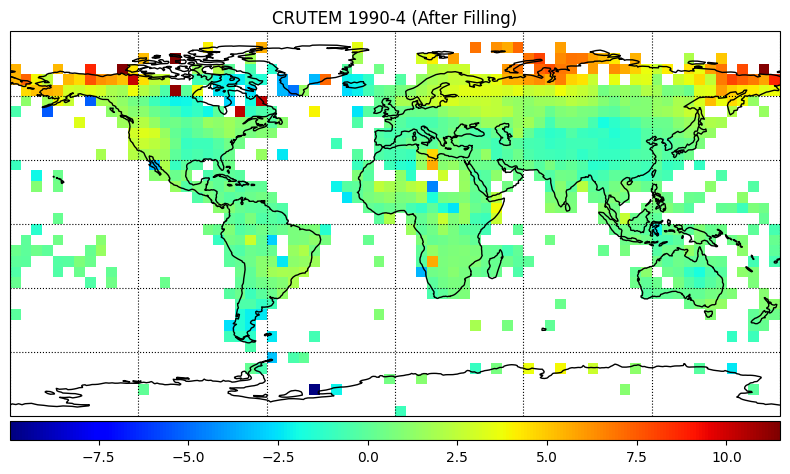

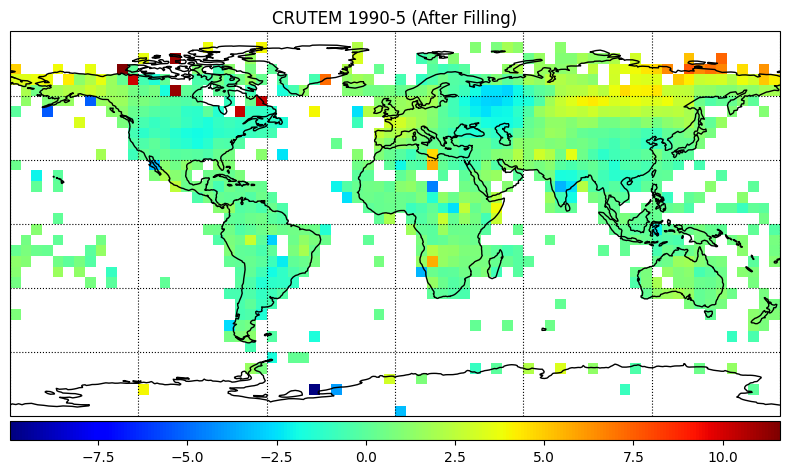

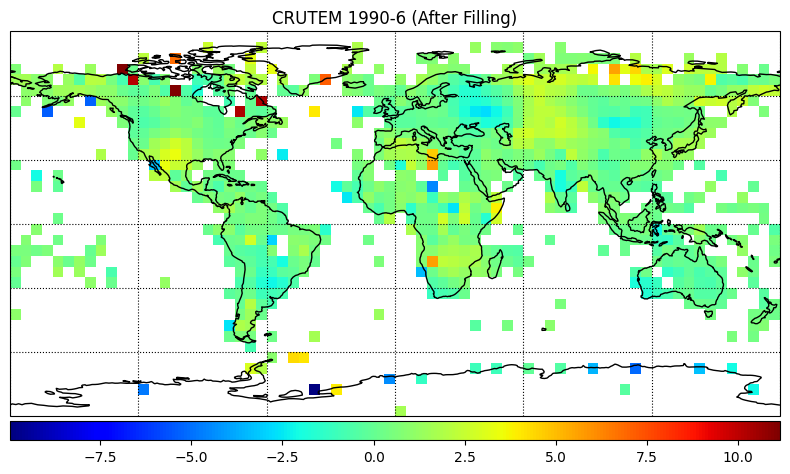

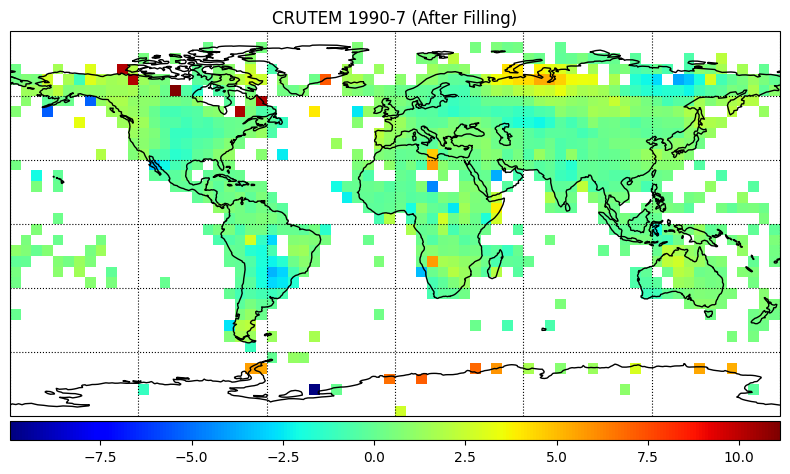

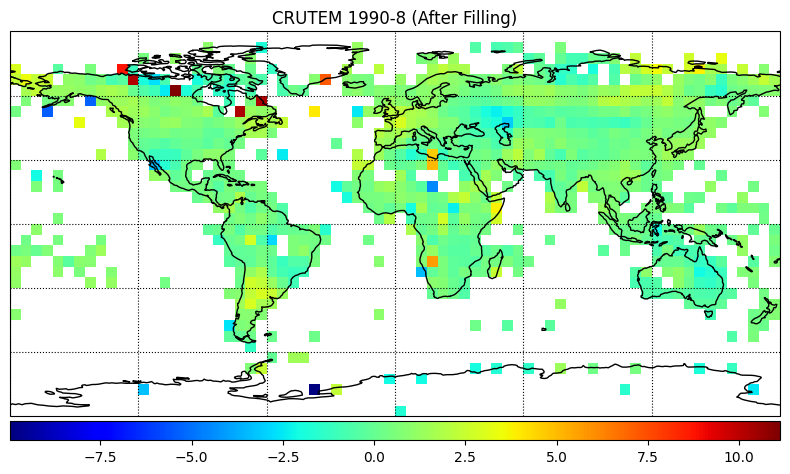

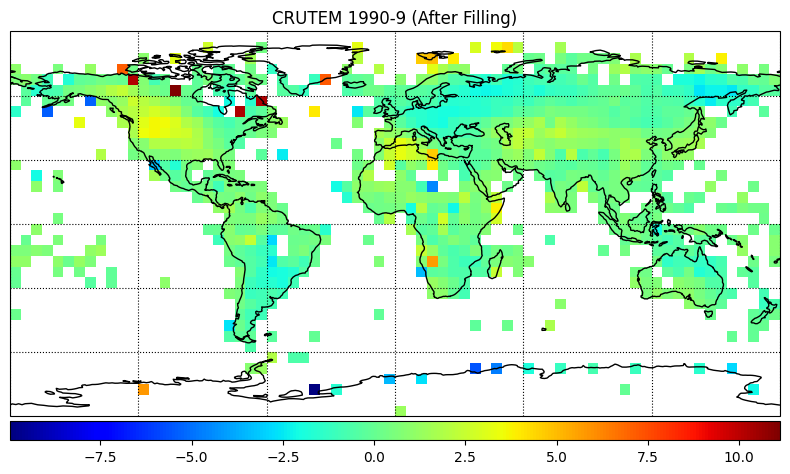

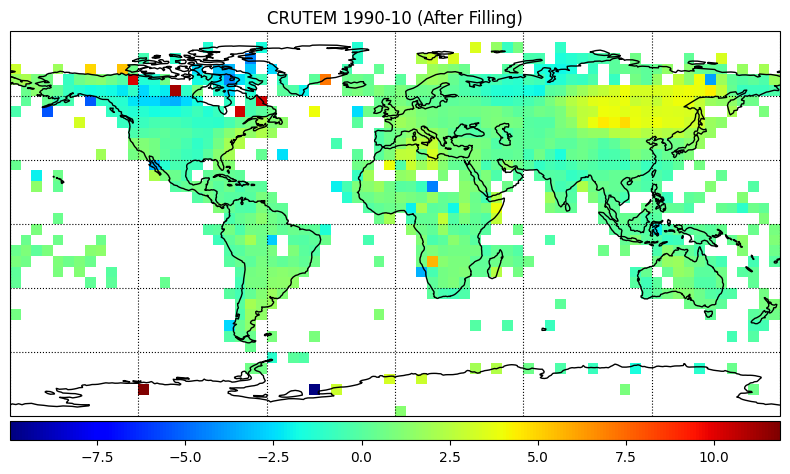

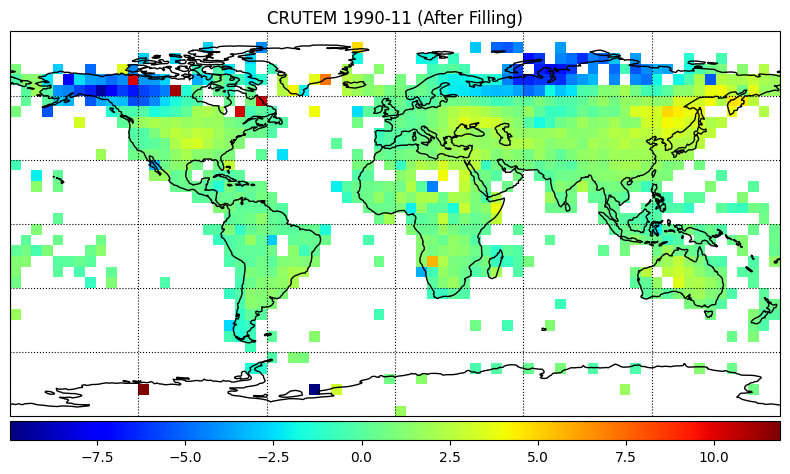

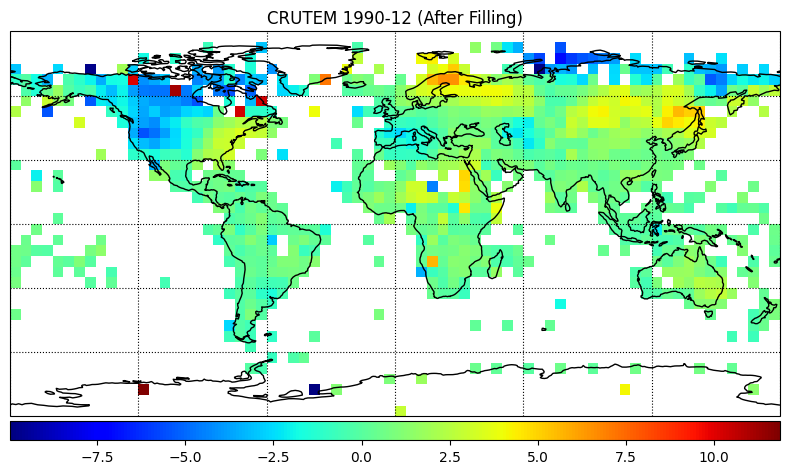

Statistics for /content/drive/MyDrive/Project_final/HadSST.4.0.1.0_median (1).nc:
Variable 'tos': Total Values = 5417280, Missing Values = 3412111
Variable 'time': Total Values = 2090, Missing Values = 0
Variable 'time_bnds': Total Values = 4180, Missing Values = 0
Variable 'latitude': Total Values = 36, Missing Values = 0
Variable 'latitude_bnds': Total Values = 72, Missing Values = 0
Variable 'longitude': Total Values = 72, Missing Values = 0
Variable 'longitude_bnds': Total Values = 144, Missing Values = 0
Missing values in HadSST before filling: 3412111


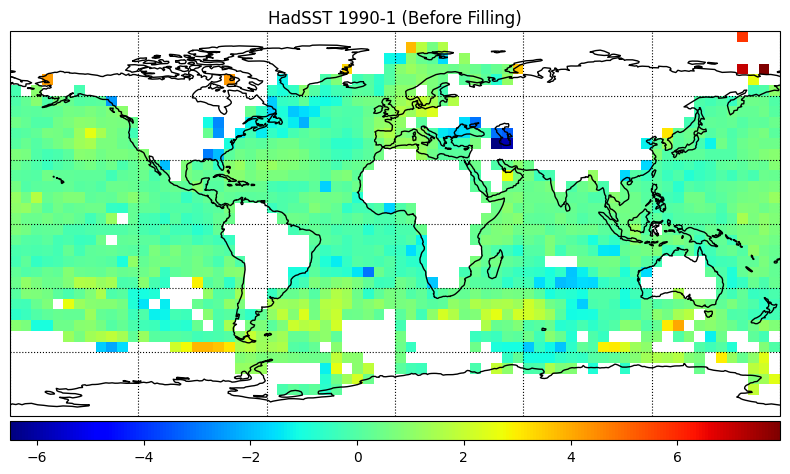

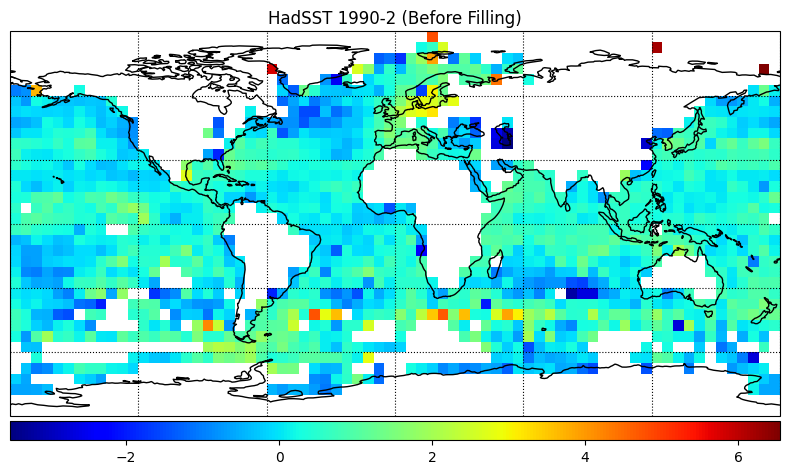

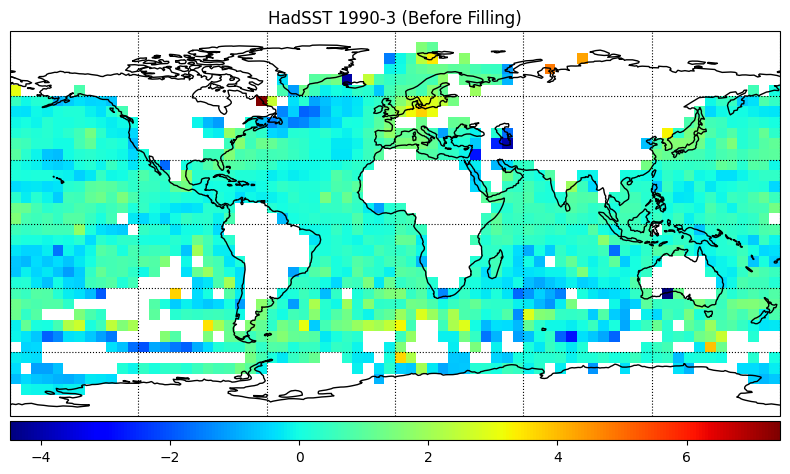

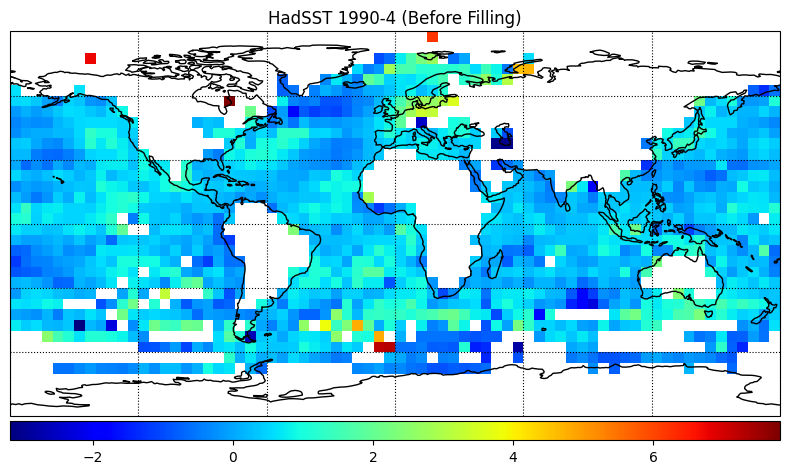

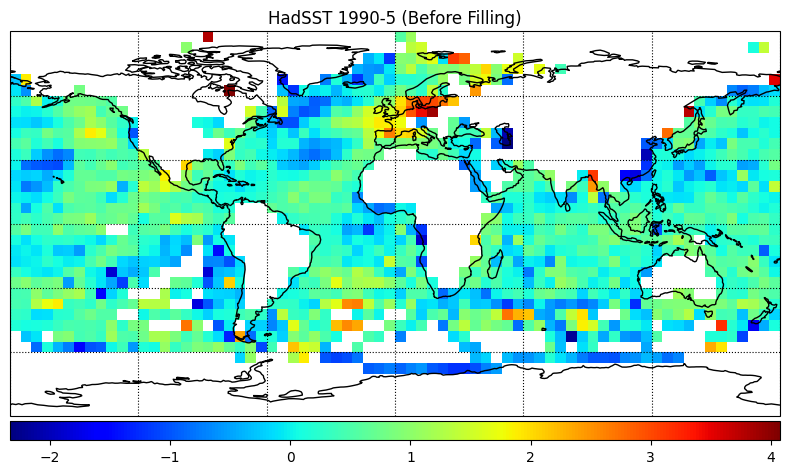

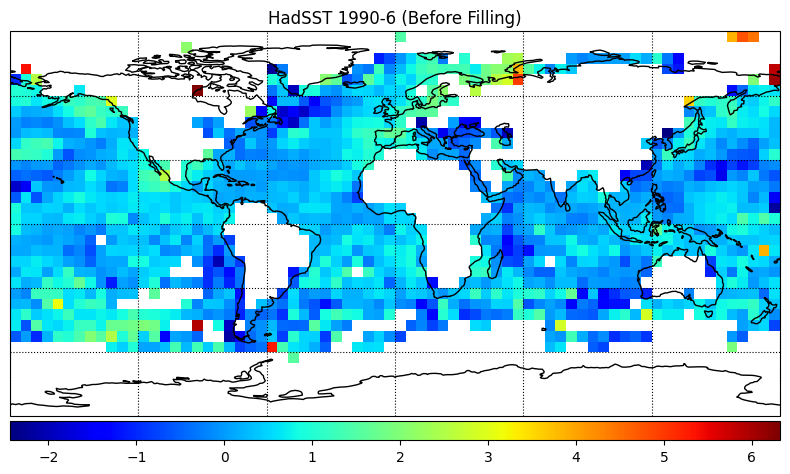

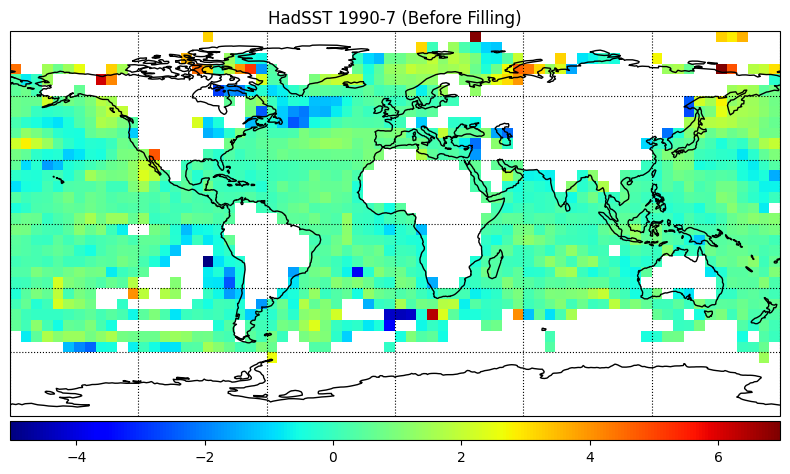

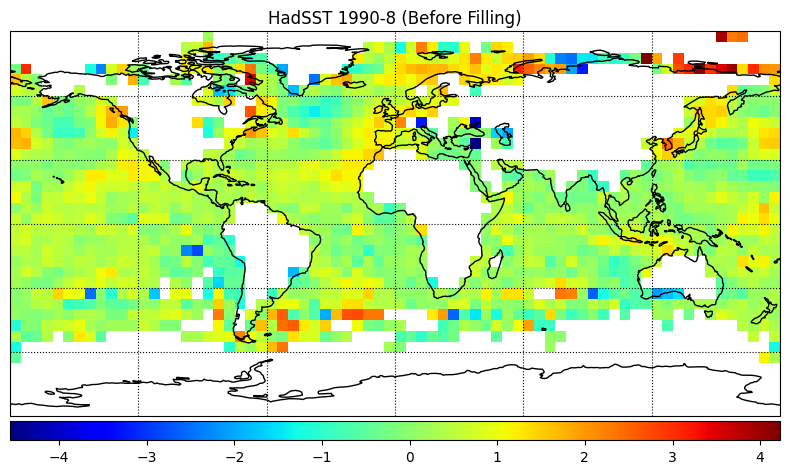

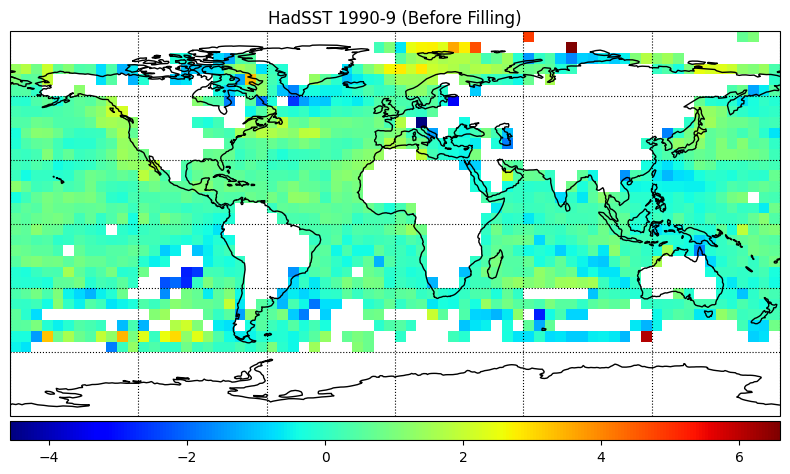

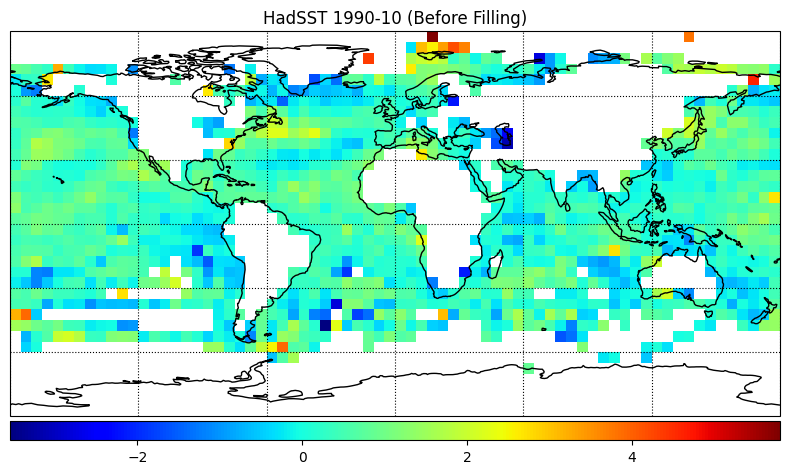

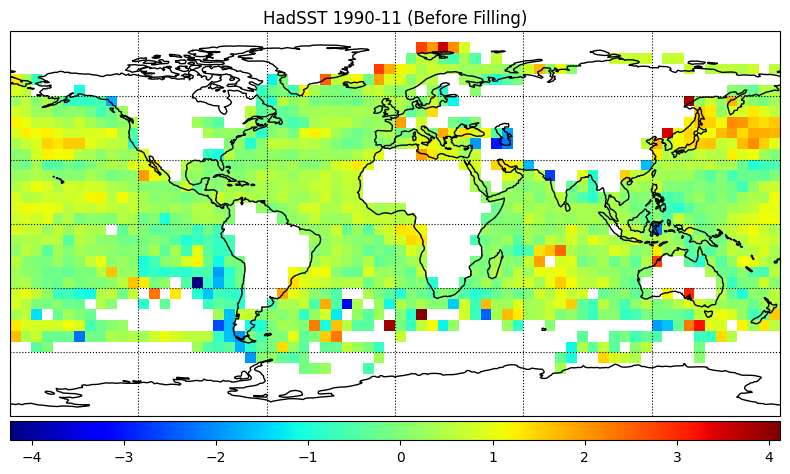

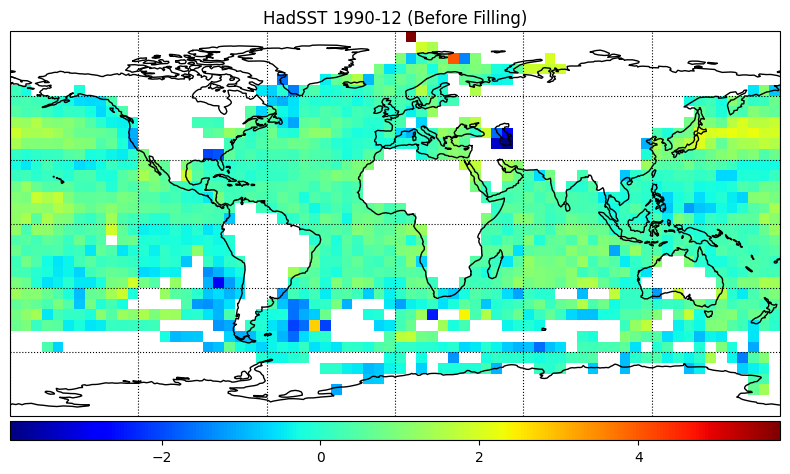

Missing values in HadSST after filling: 1488067


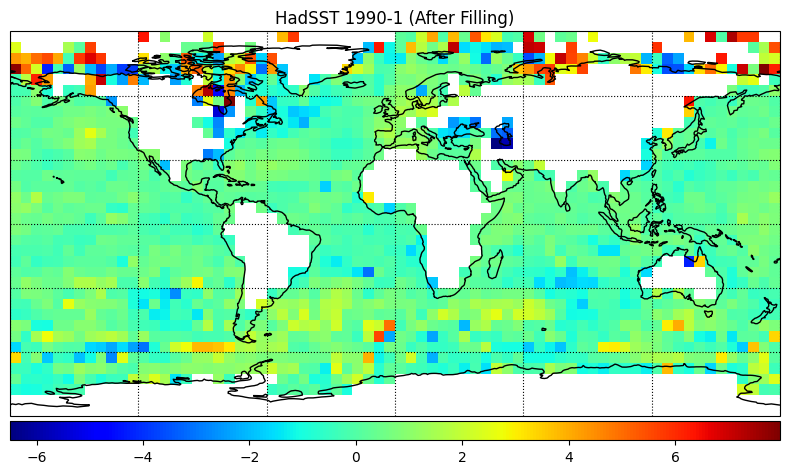

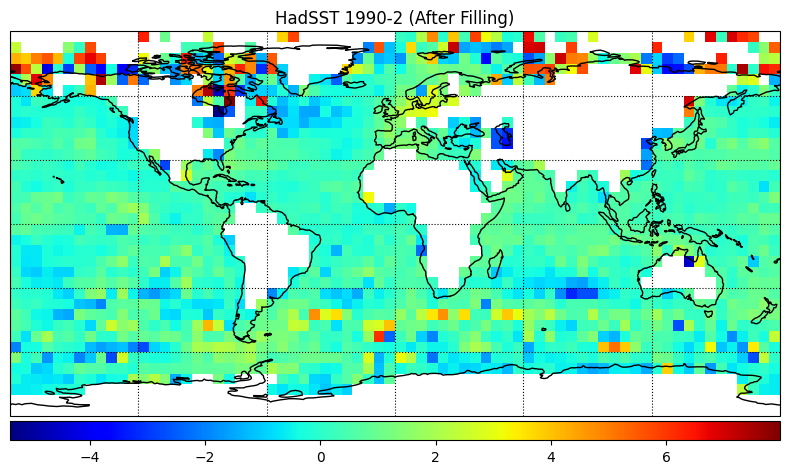

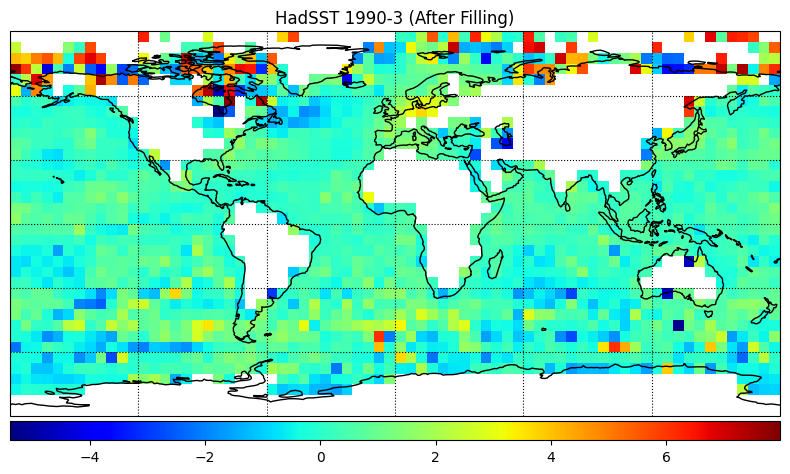

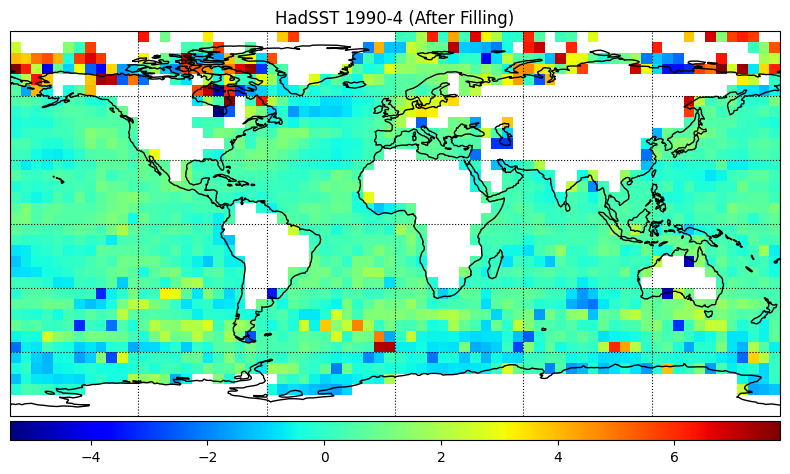

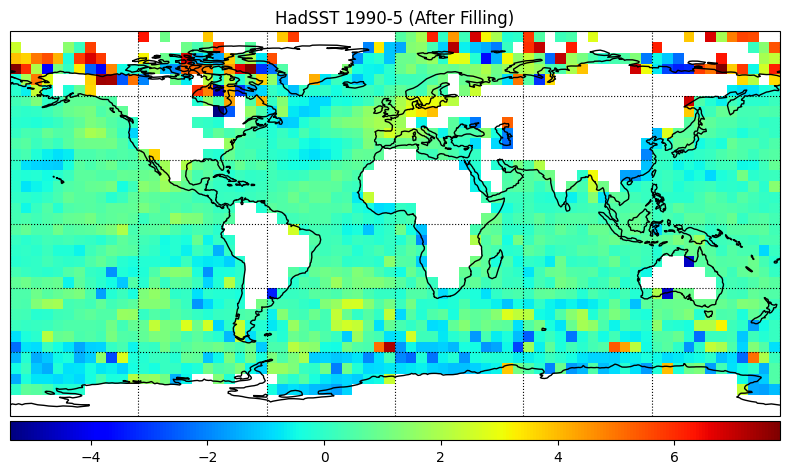

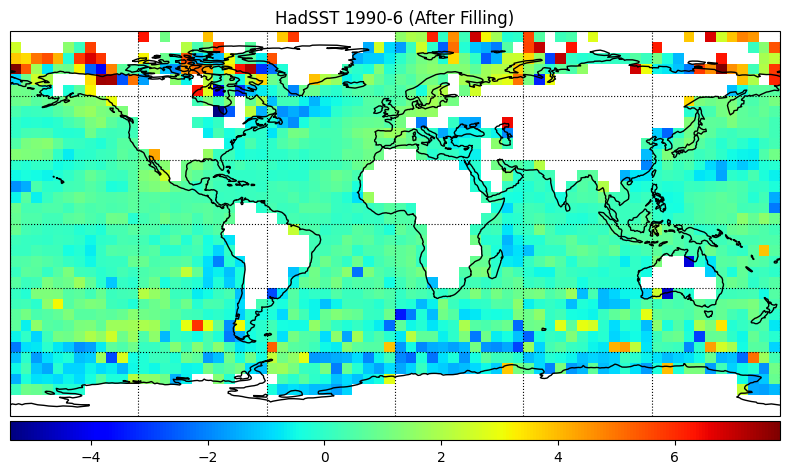

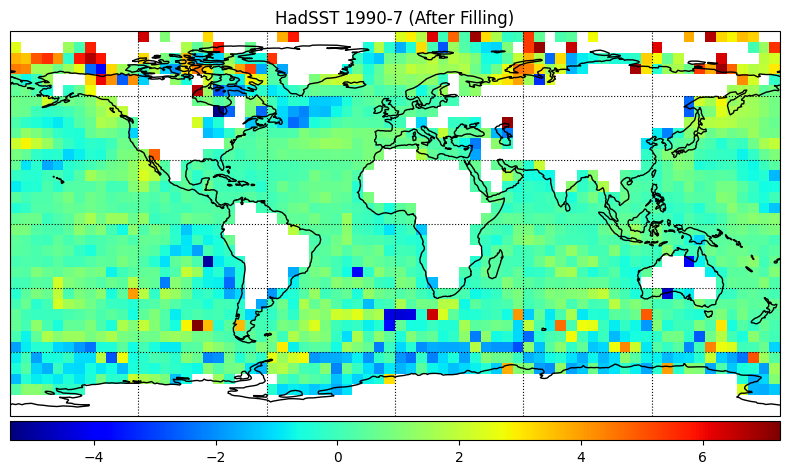

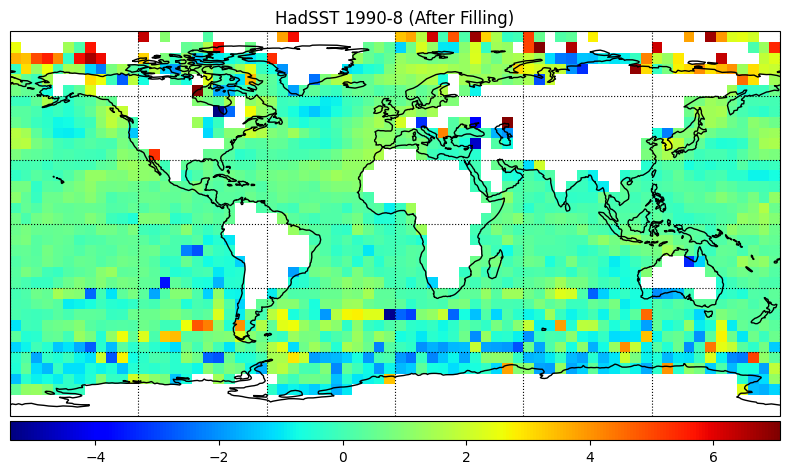

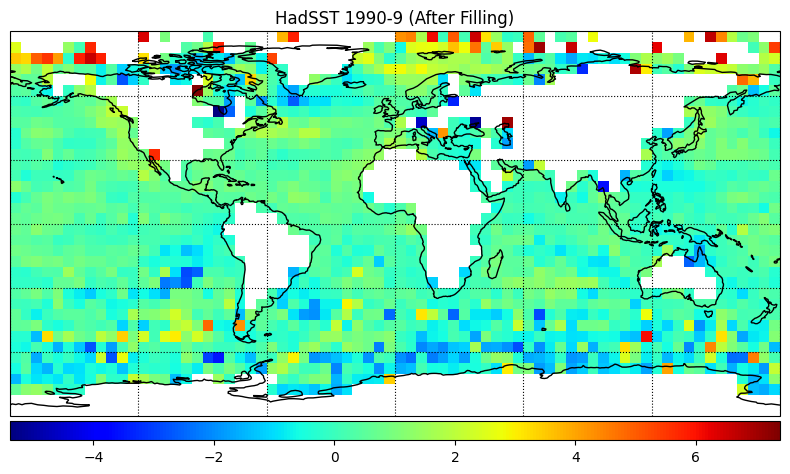

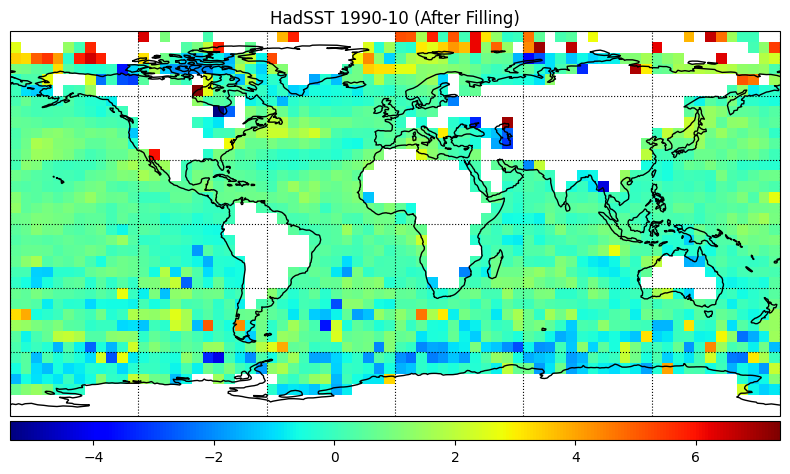

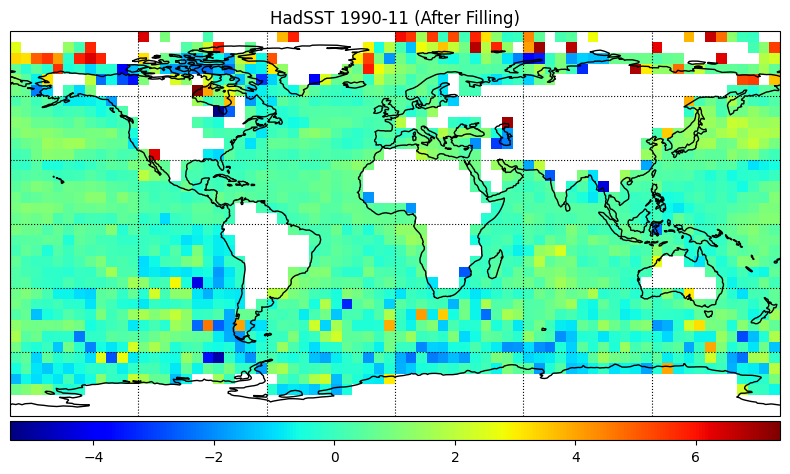

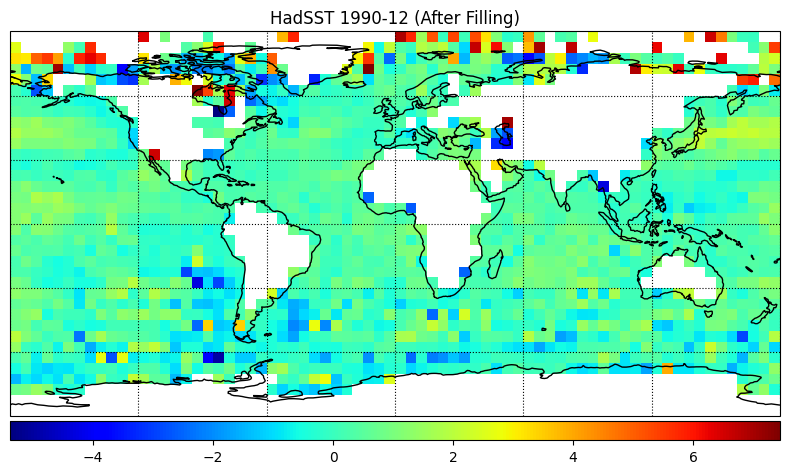

In [ ]:
# Function to fill missing values using B-spline interpolation
def fill_missing_with_bspline(data_array):
    time_index = np.arange(data_array.shape[0])
    non_missing_indices = np.where(~np.isnan(data_array))[0]
    non_missing_values = data_array[non_missing_indices]

    if len(non_missing_indices) < 4:
        return data_array

    spline = make_interp_spline(non_missing_indices, non_missing_values, k=3)
    data_array_filled = spline(time_index)
    data_array_filled = np.clip(data_array_filled, np.nanmin(non_missing_values), np.nanmax(non_missing_values))
    return data_array_filled

# Function to count missing values
def count_missing_values(data_array):
    return np.isnan(data_array).sum()

year_to_plot = 1990
cmap = matplotlib.cm.jet

# Read in data from CRUTEM NetCDF file
tmaps_crutem, dates_crutem = read_nc("/content/drive/MyDrive/Project_final/CRUTEM.5.0.2.0.anomalies (1).nc")

# Count and print missing values before filling
missing_before_filling_crutem = count_missing_values(tmaps_crutem)
print(f"Missing values in CRUTEM before filling: {missing_before_filling_crutem}")

# Plot maps for the specified year before filling missing values
for m in range(len(dates_crutem)):
    y2, m2 = dates_crutem[m]
    if y2 == year_to_plot:
        plot_map(tmaps_crutem[m, :, :], cmap, f'CRUTEM {y2}-{m2} (Before Filling)')

# Fill missing values using B-Spline interpolation for `tas` variable
for i in range(tmaps_crutem.shape[1]):
    for j in range(tmaps_crutem.shape[2]):
        tmaps_crutem[:, i, j] = fill_missing_with_bspline(tmaps_crutem[:, i, j])

# Count and print missing values after filling
missing_after_filling_crutem = count_missing_values(tmaps_crutem)
print(f"Missing values in CRUTEM after filling: {missing_after_filling_crutem}")

# Plot maps for the specified year after filling missing values
for m in range(len(dates_crutem)):
    y2, m2 = dates_crutem[m]
    if y2 == year_to_plot:
        plot_map(tmaps_crutem[m, :, :], cmap, f'CRUTEM {y2}-{m2} (After Filling)')

# Read in data from HadSST NetCDF file
tmaps_hadsst, dates_hadsst = read_nc("/content/drive/MyDrive/Project_final/HadSST.4.0.1.0_median (1).nc")

# Count and print missing values before filling
missing_before_filling_hadsst = count_missing_values(tmaps_hadsst)
print(f"Missing values in HadSST before filling: {missing_before_filling_hadsst}")

# Plot maps for the specified year before filling missing values
for m in range(len(dates_hadsst)):
    y2, m2 = dates_hadsst[m]
    if y2 == year_to_plot:
        plot_map(tmaps_hadsst[m, :, :], cmap, f'HadSST {y2}-{m2} (Before Filling)')

# Fill missing values using B-Spline interpolation for `tos` variable
for i in range(tmaps_hadsst.shape[1]):
    for j in range(tmaps_hadsst.shape[2]):
        tmaps_hadsst[:, i, j] = fill_missing_with_bspline(tmaps_hadsst[:, i, j])

# Count and print missing values after filling
missing_after_filling_hadsst = count_missing_values(tmaps_hadsst)
print(f"Missing values in HadSST after filling: {missing_after_filling_hadsst}")

# Plot maps for the specified year after filling missing values
for m in range(len(dates_hadsst)):
    y2, m2 = dates_hadsst[m]
    if y2 == year_to_plot:
        plot_map(tmaps_hadsst[m, :, :], cmap, f'HadSST {y2}-{m2} (After Filling)')
